# Lab One: Exploring Table Data

Team: Brandon Vincitore, Miro Ronac, Kirk Watson

## 1. Business Understanding 

This data can be useful in identifying trends in aviation accidents and assisting the prevention of accidents through pilot education or aircraft technology.

Every year, the National Transportation Safety Board (NTSB) tracks and records details from every aviation accident in the United States and stores the data in a public database to allow for investigation. The focus of the NTSB is to ensure transportation safety and determining probable cause. When an accident occurs, the NTSB is notified and leads to an investigative process which entails on-site fact gathering, determination of probable cause, acceptance of a final report, and upload of details to the public database. The purpose of gathering this information is to allow the NTSB to advocate for the acceptance of safety recommendations that arise from investigations. The dataset utilized in this lab is a snippet of this database which consists of non-commercial aviation accidents that occured in the calendar year of 2019.

According to the dataset being analyzed, there were over 1,000 non-commercial aviation accidents in the United States and 2019 alone. With such a high number of accidents in a dangerous form of transportation, it is important to bring to light common characteristics of aircraft accidents which could help with improving aviation safety.

Ultimately, the ability to identify recurring characteristics of aviation accidents is the intention of analyzing this dataset. With these findings, pilots can understand when and where to expect increased risks during a flight. There could be an underlying pattern in accidents related to aircraft malfunctions or pilot errors. Developing a successful classification algorithm could help with reducing accidents, monetary damages, injuries, and most importantly, fatalities. Discovering accident trends can be utilized in aviation education and improving aircraft technology.

In order to evaluate the success of a machine learning algorithm for this dataset, we must understand the stakeholders. Pilots, passengers, and airport employees are at risk of aircraft accidents and can benefit from safety improvements. In such cases where safety is a priority, it does not hurt to be overly cautious. With this being said, identifying minor or false accident trends could still prove to be helpful for aviation safety. On the other hand, being exceedingly careful could impede on efficiency with procedures and technology. The algorithm must be accurate enough to allow for improvements in safety while maintaining efficiency.

Dataset Source: https://catalog.data.gov/dataset/national-transportation-safety-board-data/resource/4bb4fc29-f747-430e-89b5-b18aadf98edf 

## 2. Data Understanding

### Importing

In [76]:
import numpy as np
import pandas as pd

print('Pandas:', pd.__version__)
print('Numpy:',  np.__version__)

df = pd.read_csv('Data_GA.csv')

df.head()

Pandas: 1.4.2
Numpy: 1.21.5


,NTSBNumber,AccidentReport,AccidentDate,City,StateOrRegion,Country,Latitude,Longitude,FatalInjuries,SeriousInjuries,...,DamageLevel,AircraftCategory,RegulationFlightConductedUnder,FlightScheduledType,FlightTerminalType,FlightServiceType,FlightOperationType,DefiningEvent,PhaseOfFlight,IntentionalAct
0,GAA19CA118,AccidentReport,1/2/19,Appleton,Minnesota,United States,45.227500,-96.004447,NaN,NaN,...,Substantial,Airplane,Part 91: General aviation,NaN,NaN,NaN,Instructional,Loss of Control on Ground,Landing,NaN
1,GAA19CA124,AccidentReport,1/2/19,Santa Maria Island,Florida,United States,27.500000,-82.746665,NaN,1.0,...,Substantial,Helicopter,Part 91: General aviation,NaN,NaN,NaN,Aerial observation,Loss of Control In-Flight,Maneuvering,NaN
2,WPR19LA054,AccidentReport,1/2/19,Sacramento,California,United States,38.600833,-121.503334,1.0,NaN,...,Substantial,Airplane,Part 91: General aviation,NaN,NaN,NaN,Personal,Abnormal Runway Contact,Landing,NaN
3,WPR19LA055,AccidentReport,1/2/19,Townsend,Montana,United States,46.289165,-111.519447,NaN,2.0,...,Substantial,Airplane,Part 91: General aviation,NaN,NaN,NaN,Personal,Low Altitude Operation,Maneuvering,NaN
4,ERA19LA085,AccidentReport,1/3/19,Wilkes-Barre,Pennsylvania,United States,41.000000,-75.000000,NaN,NaN,...,Substantial,Airplane,Part 91: General aviation,NaN,NaN,NaN,Instructional,Fuel Related,Approach,NaN


### Formatting

Given that this dataset comes from a well-maintained database, the formatting of text is consistent.

However, there are some table attributes that contain missing values as shown in the visual below.

Text(0.5, 1.0, 'Not Sorted')

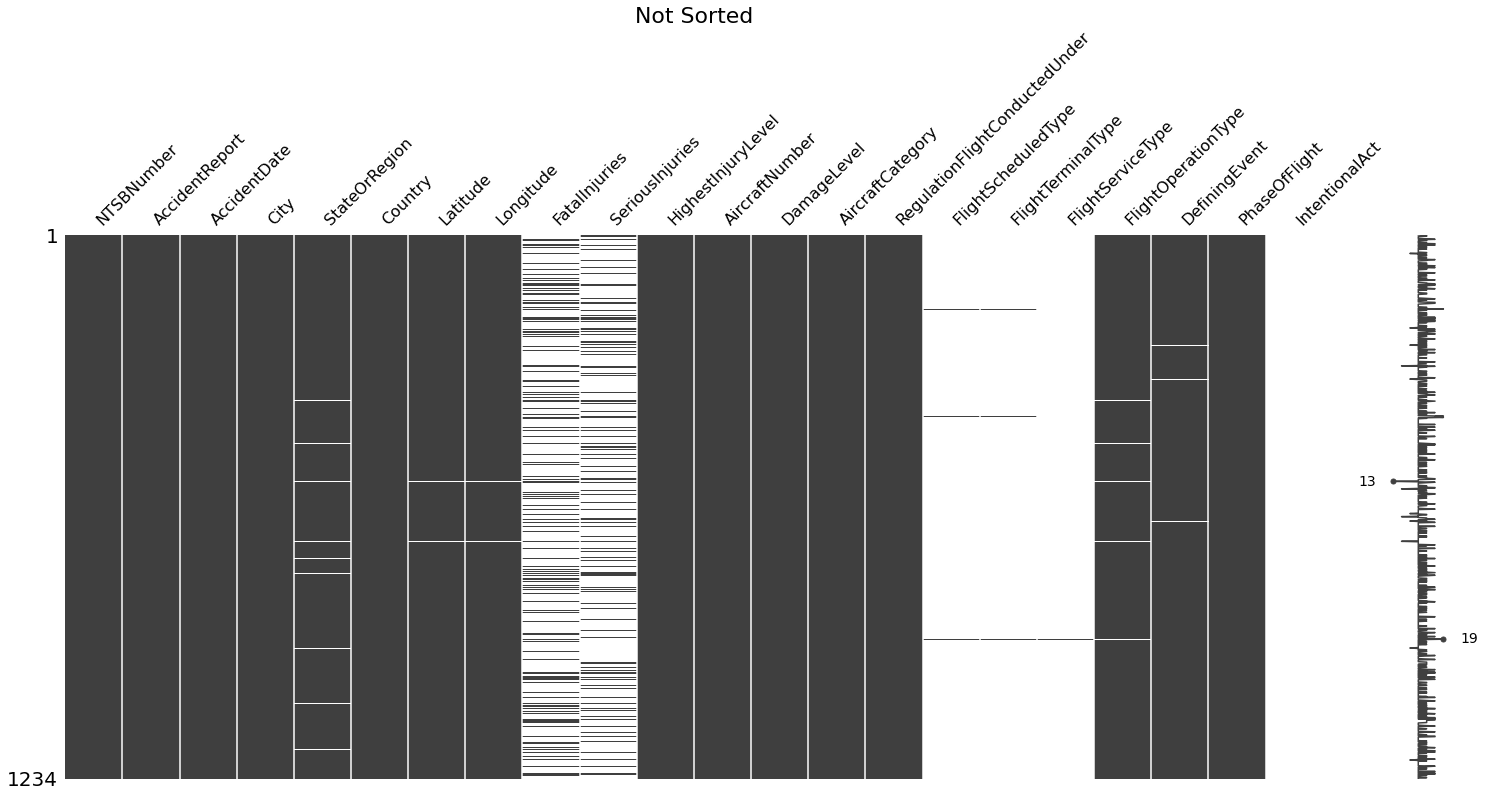

In [77]:
import matplotlib
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter('ignore', DeprecationWarning)
%matplotlib inline 

# External package: conda install missingno 
import missingno as mn

mn.matrix(df)
plt.title("Not Sorted",fontsize=22)

When looking at the FatalInjuries and SeriousInjuries columns, there is a considerable amount of missing data. These missing data values actually represent zero. For example, if an accident has no value for FatalInjuries, we can interpret that as zero fatal injuries. To make that clear, we will impute these values to 0.

There are a few empty values in the StateOrRegion column. In these instances, the Country value is outside of the United States resulting in the StateOrRegion value not needed to be recorded. However, the accidents outside of the United States are out of the scope of this analsys, so they will be removed.

There are also a few empty values in the FlightOperationType, DefiningEvent, Latitude, and Longitude columns. There are very few instances that are missing this values, so it won't take away from the quality of the dataset if they are removed. In addition, these values are unique characteristics that would be difficult to be imputed.

Using the unique NTSBNumber for each accident, we can search for duplicates and remove them from the dataset.

We will remove empty columns which include: FlightScheduledType, FlightTerminalType, FlightServiceType, and IntentionalAct.

We will also remove columns that are not useful for our analyses which include:  NTSBNumber, AccidentReport, and RegulationFlightConductedUnder.

In [78]:
# Make NaN values 0
df.FatalInjuries = df.FatalInjuries.fillna(0)
df.SeriousInjuries = df.SeriousInjuries.fillna(0)

#remove duplicates
df=df.drop_duplicates(subset=['NTSBNumber'], keep="first")

#remove rows outside of the united states
df=df[(df.Country == 'United States') & (~df.StateOrRegion.isnull())]

#remove rows with null values
df=df[(~df.FlightOperationType.isnull()) & (~df.DefiningEvent.isnull())]

#remove empty and non-useful columns
for col in ['FlightScheduledType','FlightTerminalType','FlightServiceType','IntentionalAct','NTSBNumber','AccidentReport','RegulationFlightConductedUnder']:
    if col in df:
        del df[col]

Text(0.5, 1.0, 'Not Sorted')

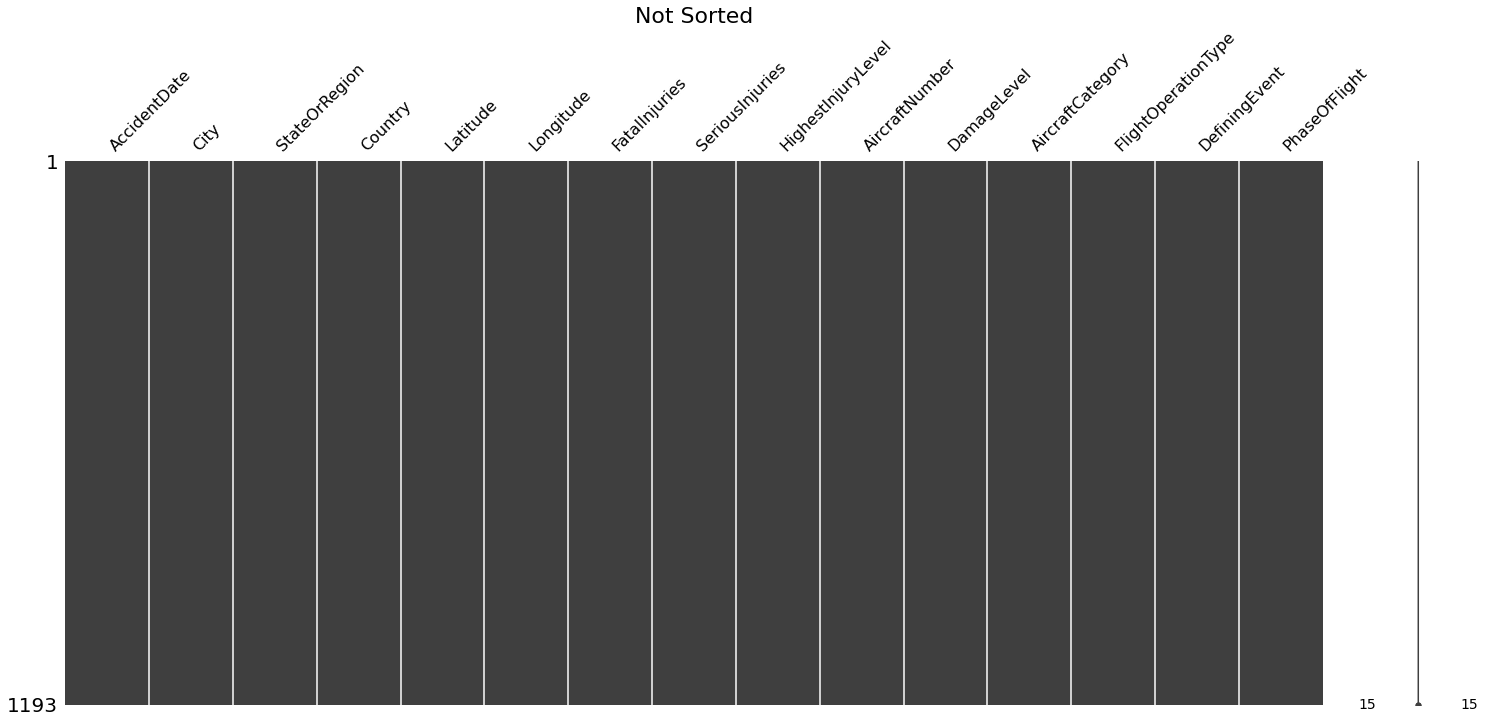

In [79]:
import matplotlib
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter('ignore', DeprecationWarning)
%matplotlib inline 

# External package: conda install missingno 
import missingno as mn

mn.matrix(df)
plt.title("Not Sorted",fontsize=22)

## 3. Data Visualization